In [22]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
def run_experiment(N):
    result = subprocess.run(['./zad39', str(N)], capture_output=True, text=True)
    data = []
    lines = result.stdout.strip().split('\n')[1:]
    for line in lines:
        n, b, loglog_estimate, hyperloglog_estimate = map(float, line.split(','))
        data.append((int(n), int(b), loglog_estimate, hyperloglog_estimate))
    return pd.DataFrame(data, columns=['n', 'b', 'loglog_estimate', 'hyperloglog_estimate'])

In [24]:
N = 10000

df = run_experiment(N)

b_values = df['b'].unique()

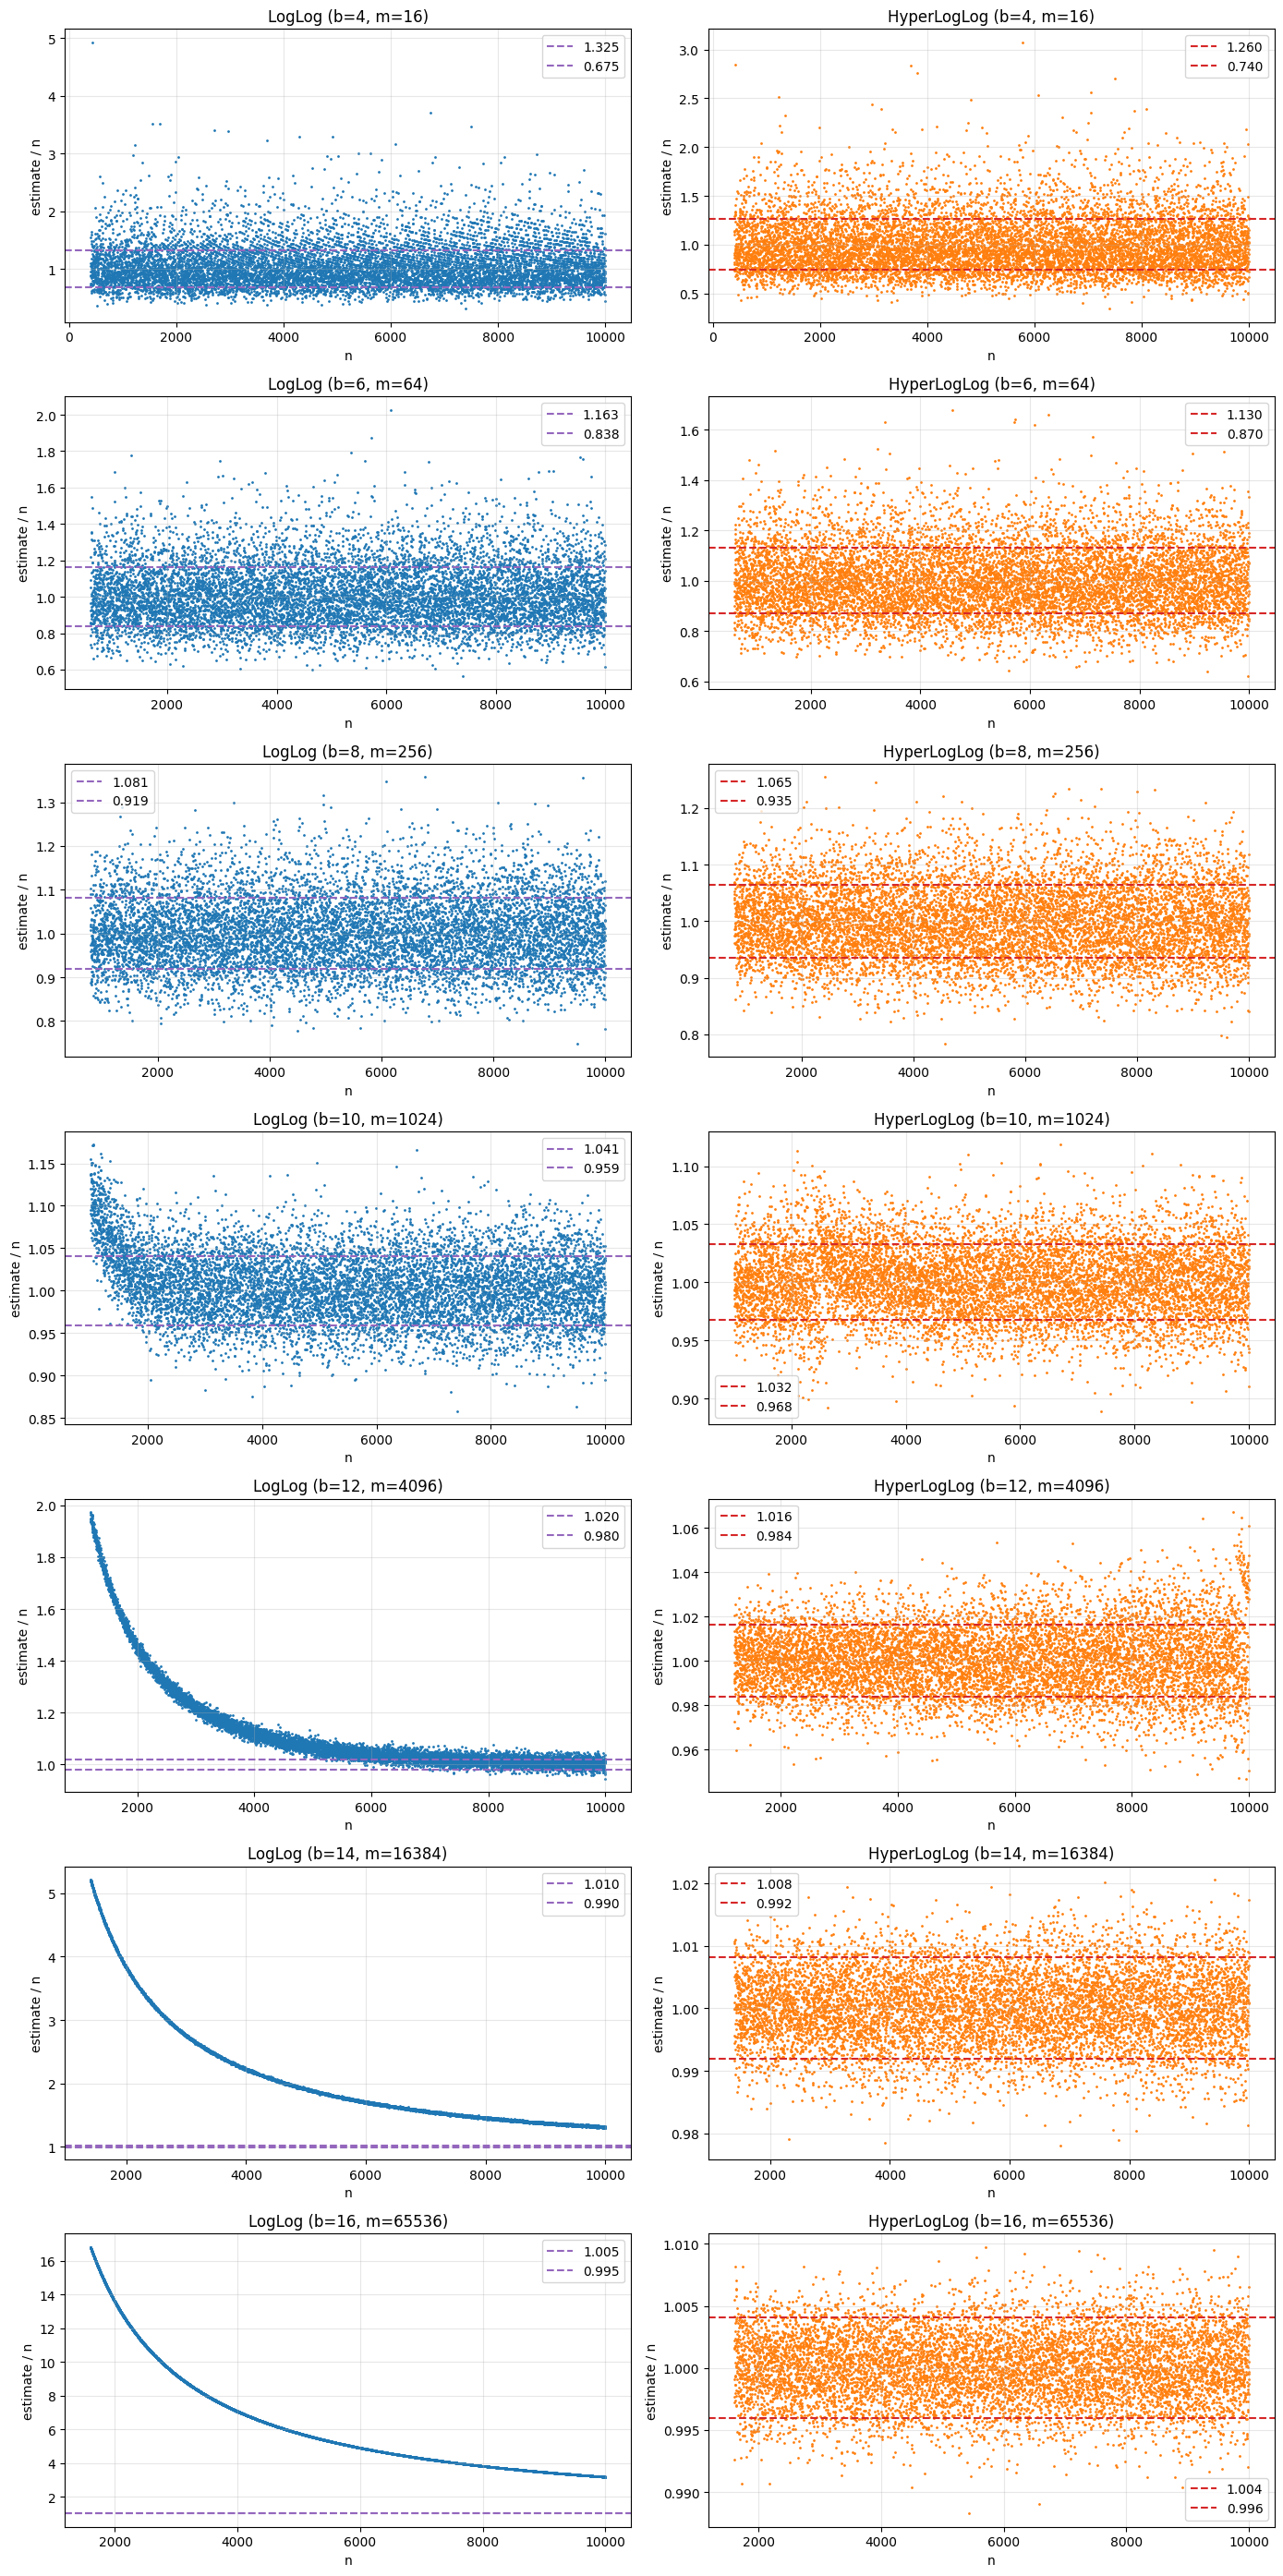

In [25]:
fig, axes = plt.subplots(len(b_values), 2, figsize=(14, 4 * len(b_values)))

for idx, b in enumerate(b_values):
    data = df[df['b'] == b]
    data = data[data['n'] > 100 * b]

    n = data['n'].values
    m = 2 ** b

    ll_ratio = data['loglog_estimate'].values / n
    hll_ratio = data['hyperloglog_estimate'].values / n

    ll_std = 1.30 / np.sqrt(m)
    hll_std = 1.04 / np.sqrt(m)
    
    ax1 = axes[idx, 0]
    ax1.scatter(n, ll_ratio, s=1, color='tab:blue')
    ax1.axhline(y=1+ll_std, color='tab:purple', linestyle='--', label=f'{1+ll_std:.3f}')
    ax1.axhline(y=1-ll_std, color='tab:purple', linestyle='--', label=f'{1-ll_std:.3f}')
    ax1.set_xlabel('n')
    ax1.set_ylabel('estimate / n')
    ax1.set_title(f'LogLog (b={b}, m={m})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2 = axes[idx, 1]
    ax2.scatter(n, hll_ratio, s=1, color='tab:orange')
    ax2.axhline(y=1+hll_std, color='tab:red', linestyle='--', label=f'{1+hll_std:.3f}')
    ax2.axhline(y=1-hll_std, color='tab:red', linestyle='--', label=f'{1-hll_std:.3f}')
    ax2.set_xlabel('n')
    ax2.set_ylabel('estimate / n')
    ax2.set_title(f'HyperLogLog (b={b}, m={m})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

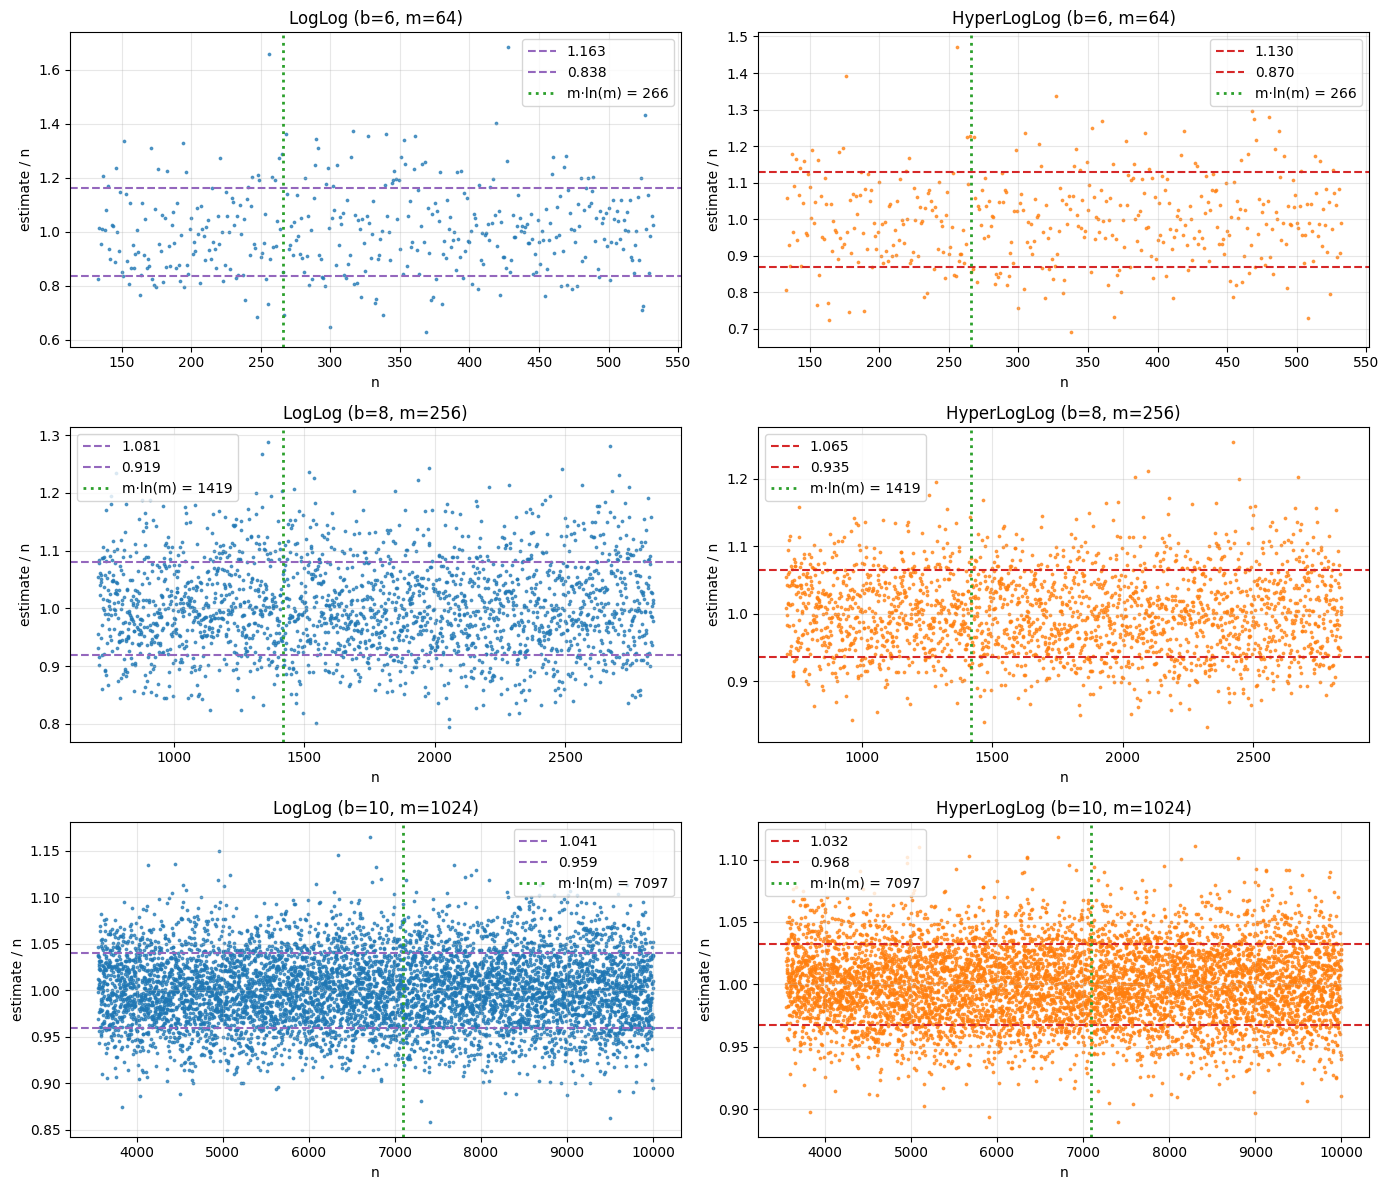

In [29]:
selected_b_values = [6, 8, 10]

fig, axes = plt.subplots(len(selected_b_values), 2, figsize=(14, 4 * len(selected_b_values)))

for idx, b in enumerate(selected_b_values):
    data = df[df['b'] == b]
    n = data['n'].values
    m = 2 ** b
    m_log_m = int(m * np.log(m))
    
    mask = (n >= m_log_m // 2) & (n <= m_log_m * 2)
    n_filtered = n[mask]
    ll_ratio = data['loglog_estimate'].values[mask] / n_filtered
    hll_ratio = data['hyperloglog_estimate'].values[mask] / n_filtered

    ll_std = 1.30 / np.sqrt(m)
    hll_std = 1.04 / np.sqrt(m)
    
    ax1 = axes[idx, 0]
    ax1.scatter(n_filtered, ll_ratio, s=3, color='tab:blue', alpha=0.7)
    ax1.axhline(y=1+ll_std, color='tab:purple', linestyle='--', label=f'{1+ll_std:.3f}')
    ax1.axhline(y=1-ll_std, color='tab:purple', linestyle='--', label=f'{1-ll_std:.3f}')
    ax1.axvline(x=m_log_m, color='tab:green', linestyle=':', linewidth=2, label=f'm·ln(m) = {m_log_m}')
    ax1.set_xlabel('n')
    ax1.set_ylabel('estimate / n')
    ax1.set_title(f'LogLog (b={b}, m={m})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2 = axes[idx, 1]
    ax2.scatter(n_filtered, hll_ratio, s=3, color='tab:orange', alpha=0.7)
    ax2.axhline(y=1+hll_std, color='tab:red', linestyle='--', label=f'{1+hll_std:.3f}')
    ax2.axhline(y=1-hll_std, color='tab:red', linestyle='--', label=f'{1-hll_std:.3f}')
    ax2.axvline(x=m_log_m, color='tab:green', linestyle=':', linewidth=2, label=f'm·ln(m) = {m_log_m}')
    ax2.set_xlabel('n')
    ax2.set_ylabel('estimate / n')
    ax2.set_title(f'HyperLogLog (b={b}, m={m})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()